In [ ]:
"""
Created on Sat Apr  6 11:33:08 2019

@author: Emirhan
"""

In [ ]:
#The libraries needed to be imported

In [1]:
import numpy as np
import pandas as pd 
from sklearn import preprocessing,neighbors,model_selection,svm,tree
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Below function is to split requests into headers

In [3]:
def split_headers(chunk):
    headers = chunk.split('\n')
    output = {}
    for i,j in enumerate(headers):
        if j !='':
            key,value = j.split(': ')#split each line by http field name and value
            output[key] = value
    return output

In [4]:
#Below function is to split file in to request and later put requests into pandas data frame

In [5]:
def txt_to_df(path):
    request=''
    liste=[]
    with open(path) as fp:  
        for line in fp:
            request=''
            line = fp.readline()
            while True:
                if line.strip() == '':
                    break
                else:
                    request=request+''+line
                    line=fp.readline()

            if request != '':
                headers=split_headers(request)
                liste.append(headers)

    data=pd.DataFrame(liste)
    return data

In [6]:
#There is adding new column to data base to describe of label of the datasets

In [7]:
path_1='normalTrafficTest.txt'
data_1=txt_to_df(path_1)
data_1['Normality']=1

In [8]:
path_2='anomalousTrafficTest.txt'
data_2=txt_to_df(path_2)
data_2['Normality']=0

In [9]:
data=data_1.append(data_2,sort=False)

In [10]:
#Below part is for cleaning the dataset.

In [11]:
#All values from the txt is saved as string they should be converted to int
data["Content-Length"]=pd.to_numeric(data["Content-Length"],errors='ignore')
data['Content_Length']=data['Content-Length']
data['Content_Type']=data['Content-Type']

In [12]:
#fill empty data with zeros to make features more usable
data=data.fillna(0)

#For request type we dont need content. We need only need to know which type of request is the request
#Turning each request type into columns gives as nominal columns which means more features for out ML algorithm
data.POST[data.POST!=0]=1
data.GET[data.GET!=0]=1
data.PUT[data.PUT!=0]=1

data.Content_Type[data.Content_Type!=0]=1

#Again turning values into numberic values
data["POST"]=pd.to_numeric(data["POST"],errors='ignore')
data["GET"]=pd.to_numeric(data["GET"],errors='ignore')
data["PUT"]=pd.to_numeric(data["PUT"],errors='ignore')
data["Content_Type"]=pd.to_numeric(data["Content_Type"],errors='ignore')

#Mapping host values to process better
data['Host'] = data['Host'].map({'localhost:8080': 1, 'localhost:9090': 0})

In [13]:
#This part is for dropping unnecessary columns
#Cookie is a type of ID. ID values are usually not important for classification models
#Rest of the features are same for all data which means we dont need them
data=data.drop(columns=['Cookie','User-Agent','Accept-Charset','Cache-control','Connection','Accept-Encoding','Accept','Accept-Language','Pragma','Content-Type','Content-Length'])

In [14]:
#To prevent overfitting or any type of confusion for model we need to shuffle the dataset
data=shuffle(data)

In [15]:
#To understand data and to visualize data

In [16]:
data.describe()

,GET,Host,POST,Normality,PUT,Content_Length,Content_Type
count,61064.000000,61064.000000,61064.000000,61064.000000,61064.000000,61064.000000,61064.000000
mean,0.413828,0.993515,0.287895,0.589545,0.003914,31.951444,0.294380
std,0.492522,0.080269,0.452785,0.491920,0.062439,75.697057,0.455767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,17.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,836.000000,1.000000


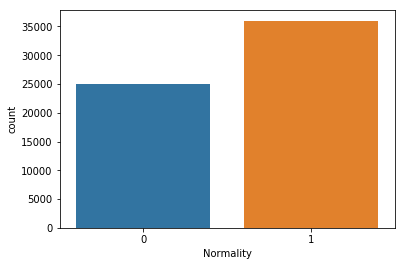

In [17]:
sns.countplot(data['Normality'],label="Sum")

plt.show()

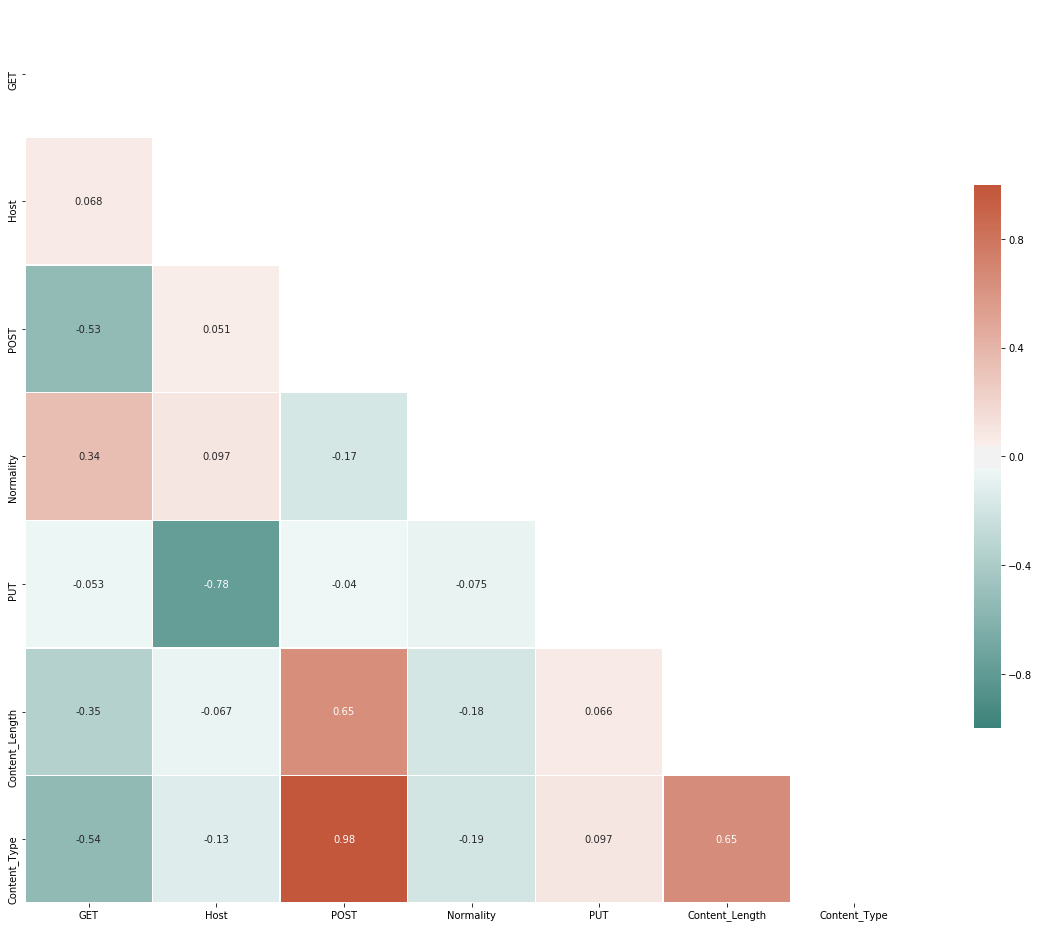

In [18]:
correlation = data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()


In [19]:
#We need to split our dataset to 2 part X and Y
#The reason why is to split our data set into predictors and target
#X's are predictor and Y is our target and also our label
#using model selection from sklearn we split our data set again training and test dataset
#Training is for training our ML model and Test is for testing our ML model

In [20]:
X=np.array(data.drop(['Normality'],1))
y=np.array(data['Normality'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [21]:
#After preparing our dataset for Machine learning
#We can start using ML algorith to train model for detecting anomalies in the http requests 

In [22]:
#we have two classes Anomaly and Normal Request
#I think supervised classification Machine Learning one of the best use for this type of problem

In [23]:
#Below via Sklearn I used and put for comparison most common classification algorithms

In [24]:
#First one is Support Vector Machine

In [25]:
clf_1=svm.SVC(C=0.01, gamma='auto')
clf_1.fit(X_train,y_train)

accuracy_1=clf_1.score(X_test,y_test)

In [26]:
#Second one is K Nearest Neighbors

In [27]:
clf_2= neighbors.KNeighborsClassifier(n_neighbors=3)
clf_2.fit(X_train,y_train)

accuracy_2=clf_2.score(X_test,y_test)

In [28]:
#And the third one is Decision Tree Model

In [29]:
clf_3= tree.DecisionTreeClassifier()
clf_3.fit(X_train,y_train)

accuracy_3=clf_3.score(X_test,y_test)

In [30]:
#After training and observing results for couple time we can clearly see 3 model are 
#Reacting same for given data set
#Approximate accuracy of the models for given dataset is 70-72%
#This accuracy is not reliable.

In [31]:
print('Accuracy of Support Vector Machine:',accuracy_1)
print('Accuracy of K Neighbors:',accuracy_2)
print('Accuracy of Decision Tree:',accuracy_3)

Accuracy of Support Vector Machine: 0.706951608941
Accuracy of K Neighbors: 0.705559649554
Accuracy of Decision Tree: 0.719069843609


In [32]:
#As a result the things can be done:
#    1-)Cleaning data set more
#    2-)Gathering stronger and more data
#    3-)Chosing another model 
#    4-)Creating new model for given dataset
#    5-)Trying various Deep Learning models for given datasets
  